<a href="https://colab.research.google.com/github/wasp33/ximen0703/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

````
tensorflow 2 = tensorflow + keras
!!! import keras -> import tensorflow.keras
````

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test)=load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

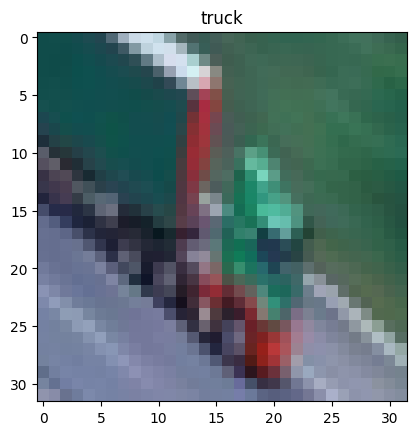

In [ ]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 50
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
l=[
    Conv2D(64,3, activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(128,3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256,3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512,3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
l = [
    # 1f(3 * 3 * 3) * 64 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1f(3 * 3 * 64) * 128 + 128 = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)       

In [ ]:
# 一切均與斜率有關
# Sparse: 你不用自己做one-hot encoding
# 優化器: 1. 無法找出全局最佳解, 但至少不要停在窪點 -> 小彈珠優化 M_now + BetaM_before = M_now
#     2. 時間優化 W = W_now- M * 步 decay =>  T_小: 大, T_大: 小
# adam => 兩種優化器合在一起
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# X: scaling, 隨機係數是有在跟你的輸入作配合的
# 0~1 / -1~1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# batch_size = 20(圖片大或資料少)~200(圖片小或資料多)
# 54000 / 200 = 270(梯度下降)
# 沒做任何事: 差不多100個epch訓練完畢
# relu: 35epoch
# ce: 15epoch
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
225/225 [==============================] - 5s 21ms/step - loss: 1.4214 - accuracy: 0.4824 - val_loss: 1.2812 - val_accuracy: 0.5302
Epoch 2/100
225/225 [==============================] - 4s 18ms/step - loss: 1.1304 - accuracy: 0.5959 - val_loss: 1.0299 - val_accuracy: 0.6310
Epoch 3/100
225/225 [==============================] - 4s 19ms/step - loss: 0.9550 - accuracy: 0.6654 - val_loss: 0.9064 - val_accuracy: 0.6844
Epoch 4/100
225/225 [==============================] - 4s 19ms/step - loss: 0.8263 - accuracy: 0.7106 - val_loss: 0.8026 - val_accuracy: 0.7256
Epoch 5/100
225/225 [==============================] - 5s 21ms/step - loss: 0.7351 - accuracy: 0.7430 - val_loss: 0.7311 - val_accuracy: 0.7544
Epoch 6/100
225/225 [==============================] - 4s 18ms/step - loss: 0.6576 - accuracy: 0.7697 - val_loss: 0.7617 - val_accuracy: 0.7378
Epoch 7/100
225/225 [==============================] - 4s 19ms/step - loss: 0.5820 - accuracy: 0.7988 - val_loss: 0.6680 - val_accuracy:

In [33]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6802 - accuracy: 0.7673


[0.6801685094833374, 0.767300009727478]

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(pre)".format(trans[i]) for i in range(10)],
      index=["{}(true)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pre),automobile(pre),bird(pre),cat(pre),deer(pre),dog(pre),frog(pre),horse(pre),ship(pre),truck(pre)
airplane(true),725,11,68,18,32,1,6,9,89,41
automobile(true),7,837,5,12,8,2,10,2,31,86
bird(true),36,3,727,42,87,27,46,17,9,6
cat(true),10,3,78,657,89,70,54,29,5,5
deer(true),5,1,55,37,808,11,38,33,11,1
dog(true),12,3,66,209,69,553,29,47,7,5
frog(true),2,1,62,51,28,6,837,4,6,3
horse(true),9,2,38,42,99,23,7,771,2,7
ship(true),15,15,10,21,12,2,5,1,904,15
truck(true),20,51,8,21,7,3,6,10,20,854


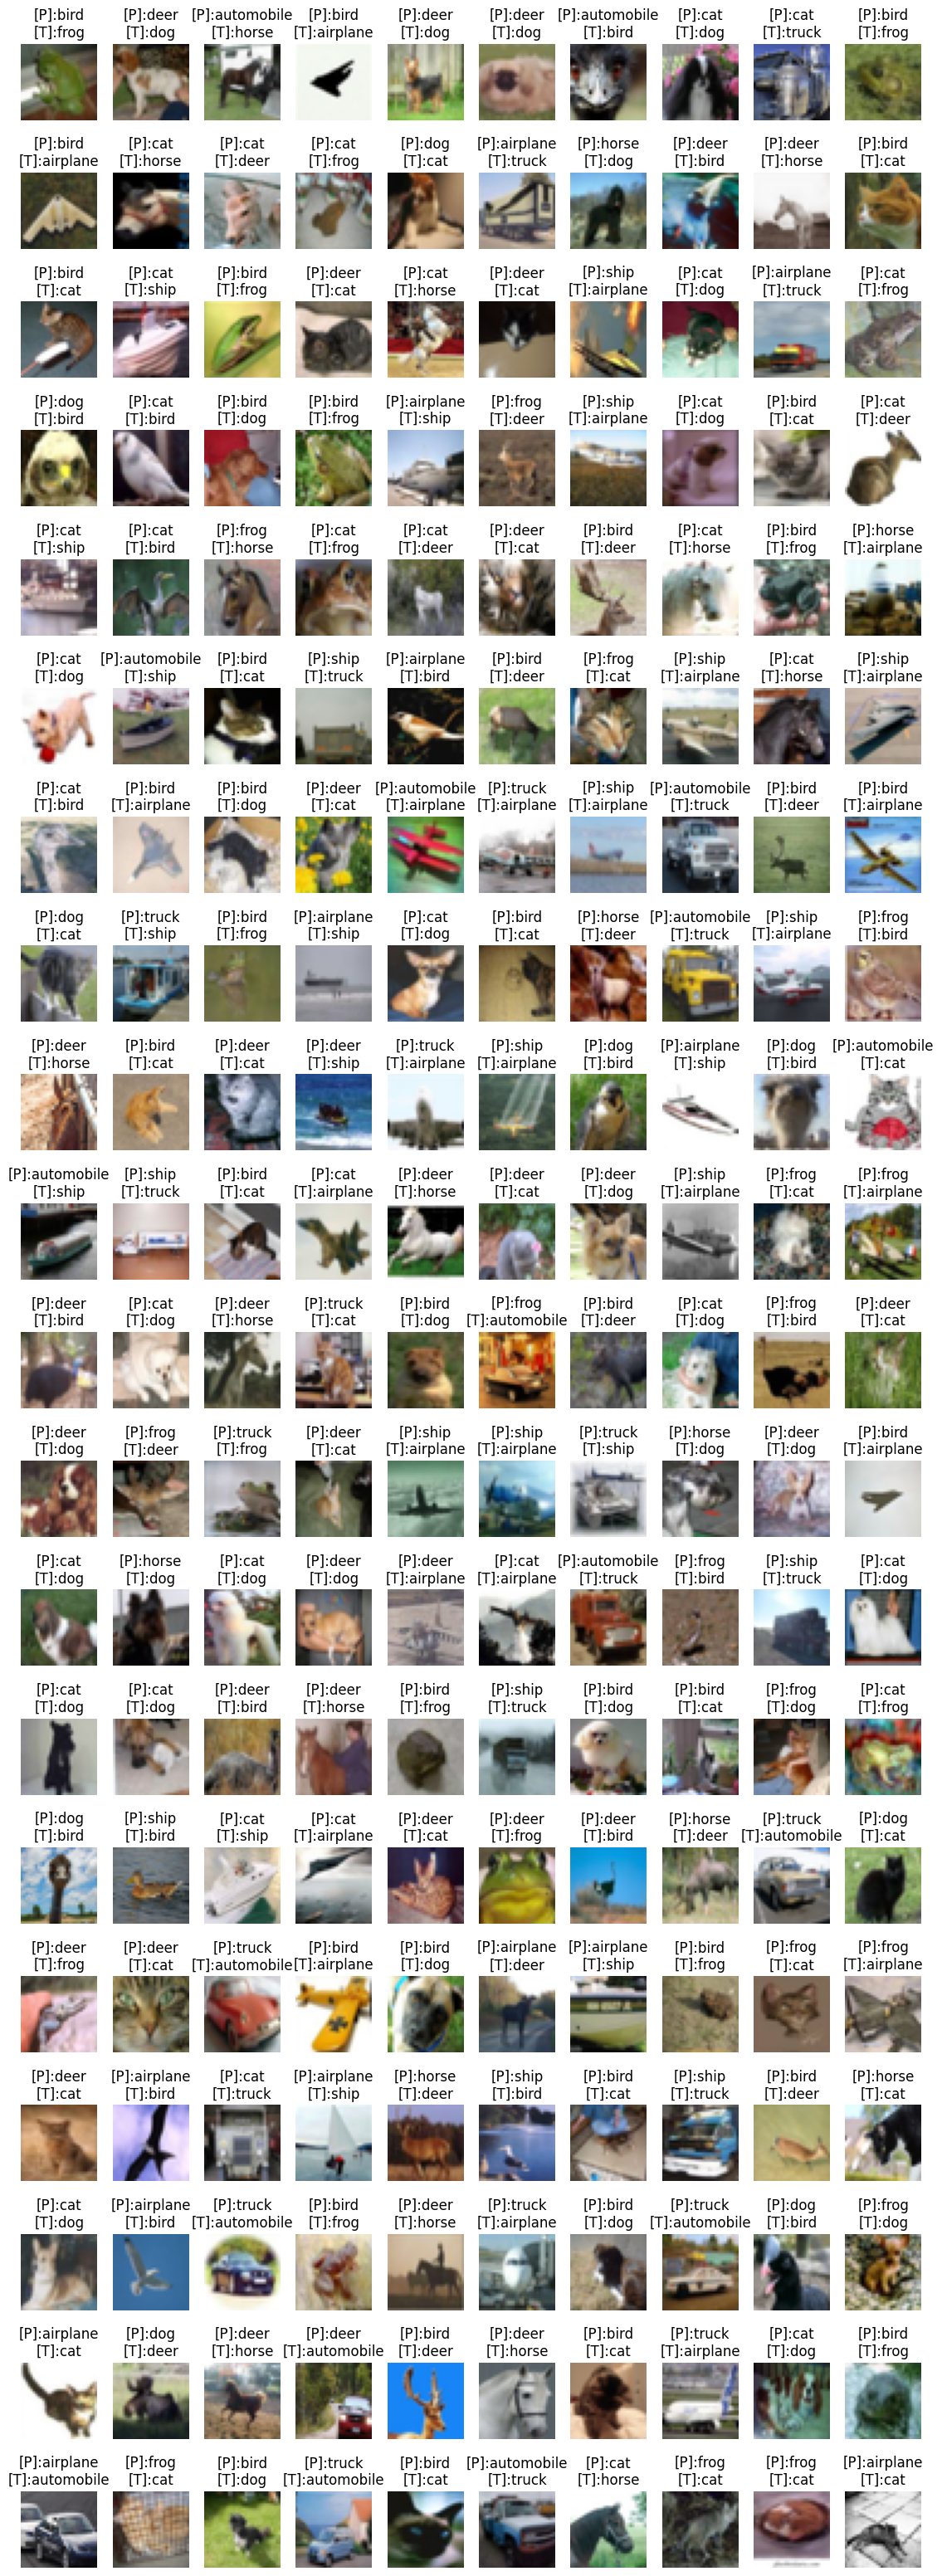

In [35]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    # 總高/總寬/ith
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(trans[false_pre[i]], trans[false_true[i]])
    plt.title(t)
    plt.imshow(false_img[i])
    plt.axis("off")
